In [1]:
import os
import sys
sys.path.append('../utils')
import utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import Isomap

/Users/paolomollica/Projects/data-spell-projects/machine-learning-project/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
TRAIN_DATA = os.path.join('..', '..', 'datasets', 'cup2023', 'ML-CUP23-TR.csv')
TEST_DATA = os.path.join('..', '..', 'datasets', 'cup2023', 'ML-CUP23-TS.csv')
IMAGES_FOLDER = os.path.join('..', '..', 'images', 'cup2023', 'exploration')

In [3]:
# To skip the first column (row indexes)
columns_to_read = list(range(1, 14))

df_train = pd.read_csv(TRAIN_DATA, header=None, comment='#', usecols=columns_to_read)
df_train = df_train.astype('float64')
df_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.917280,-0.712727,-0.989904,0.992819,0.993649,0.995543,0.711074,0.407645,-0.688548,0.616890,7.897453,-35.936382,21.077147
1,-0.858784,0.998755,-0.998396,0.999909,0.316503,-0.951897,-0.163139,0.980982,0.661759,-0.800155,-9.330632,19.901571,6.069154
2,-0.990441,0.958726,-0.998675,0.997216,0.987166,0.356483,-0.279689,0.599163,-0.684630,0.922901,14.849400,3.374090,19.667479
3,0.937117,0.984474,-0.612420,0.999812,0.728623,-0.539962,-0.165939,0.999352,-0.921444,-0.974766,-46.591854,13.734777,17.953600
4,-0.906628,-0.884567,-0.932487,0.941037,0.978134,0.998179,0.749606,-0.590599,-0.508268,0.691798,8.217500,-45.885254,14.894251


In [4]:
# To skip the first column (row indexes)
columns_to_read = list(range(1, 11))

df_test = pd.read_csv(TEST_DATA, header=None, comment='#', usecols=columns_to_read)

df_test.head()

,1,2,3,4,5,6,7,8,9,10
0,-0.983589,0.989514,-0.998539,0.999440,0.970297,-0.234119,-0.133332,0.899576,-0.605156,0.656074
1,-0.296891,-0.831832,-0.967981,0.986235,0.998669,0.997767,-0.340468,0.817937,-0.968516,0.699273
2,-0.986512,0.979557,-0.998547,0.999430,0.985407,0.166472,0.035096,0.877812,-0.698500,0.667267
3,-0.594083,0.986703,-0.992113,0.999881,0.982517,0.187048,-0.135851,0.995478,-0.801041,-0.864406
4,0.940018,0.934761,-0.159506,0.999147,0.846696,0.413116,-0.628644,0.998797,-0.967884,-0.949134


In [5]:
features = ['feature_' + str(i) for i in range(1, 11)]
targets = ['target_x', 'target_y', 'target_z']

# Rename columns
new_column_names = features + targets
df_train.columns = new_column_names
df_test.columns = features

df_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target_x,target_y,target_z
0,-0.917280,-0.712727,-0.989904,0.992819,0.993649,0.995543,0.711074,0.407645,-0.688548,0.616890,7.897453,-35.936382,21.077147
1,-0.858784,0.998755,-0.998396,0.999909,0.316503,-0.951897,-0.163139,0.980982,0.661759,-0.800155,-9.330632,19.901571,6.069154
2,-0.990441,0.958726,-0.998675,0.997216,0.987166,0.356483,-0.279689,0.599163,-0.684630,0.922901,14.849400,3.374090,19.667479
3,0.937117,0.984474,-0.612420,0.999812,0.728623,-0.539962,-0.165939,0.999352,-0.921444,-0.974766,-46.591854,13.734777,17.953600
4,-0.906628,-0.884567,-0.932487,0.941037,0.978134,0.998179,0.749606,-0.590599,-0.508268,0.691798,8.217500,-45.885254,14.894251


# Distributions

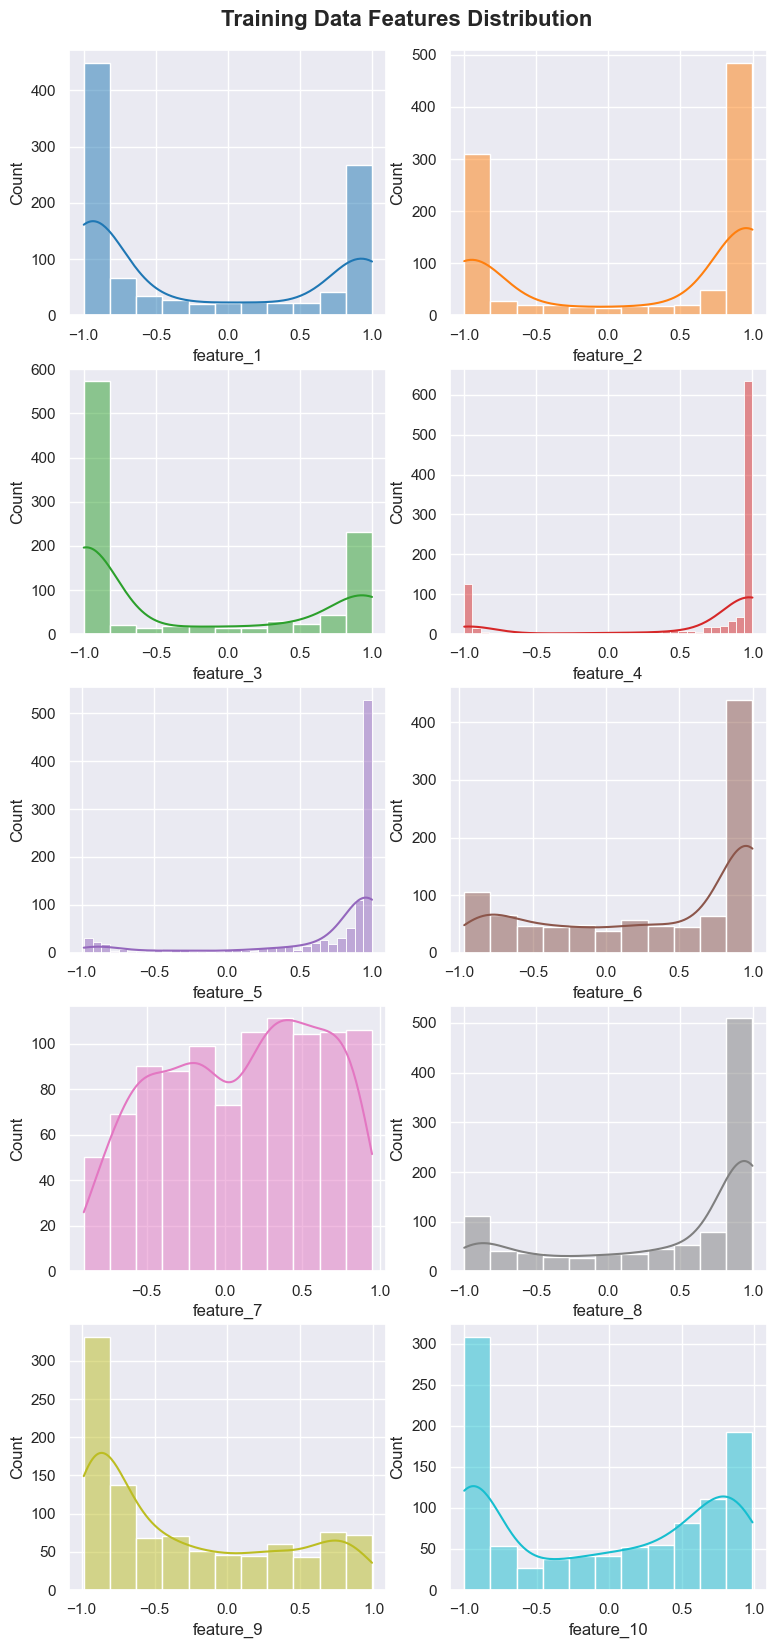

In [6]:
fig, axs = plt.subplots(5, 2, figsize=(9, 20))
fig.suptitle('Training Data Features Distribution', fontweight='bold', fontsize=16, y=.9)

colors = sns.color_palette('tab10')

i, j = 0, 0
for idx in range(len(features)):
    sns.histplot(data=df_train, x=features[idx], kde=True, color=colors[idx], ax=axs[i, j])
    if j < 1:
        j += 1
    else:
        j = 0
        i += 1

utils.save_plot(plt, IMAGES_FOLDER, 'train_features_distribution')
plt.show()

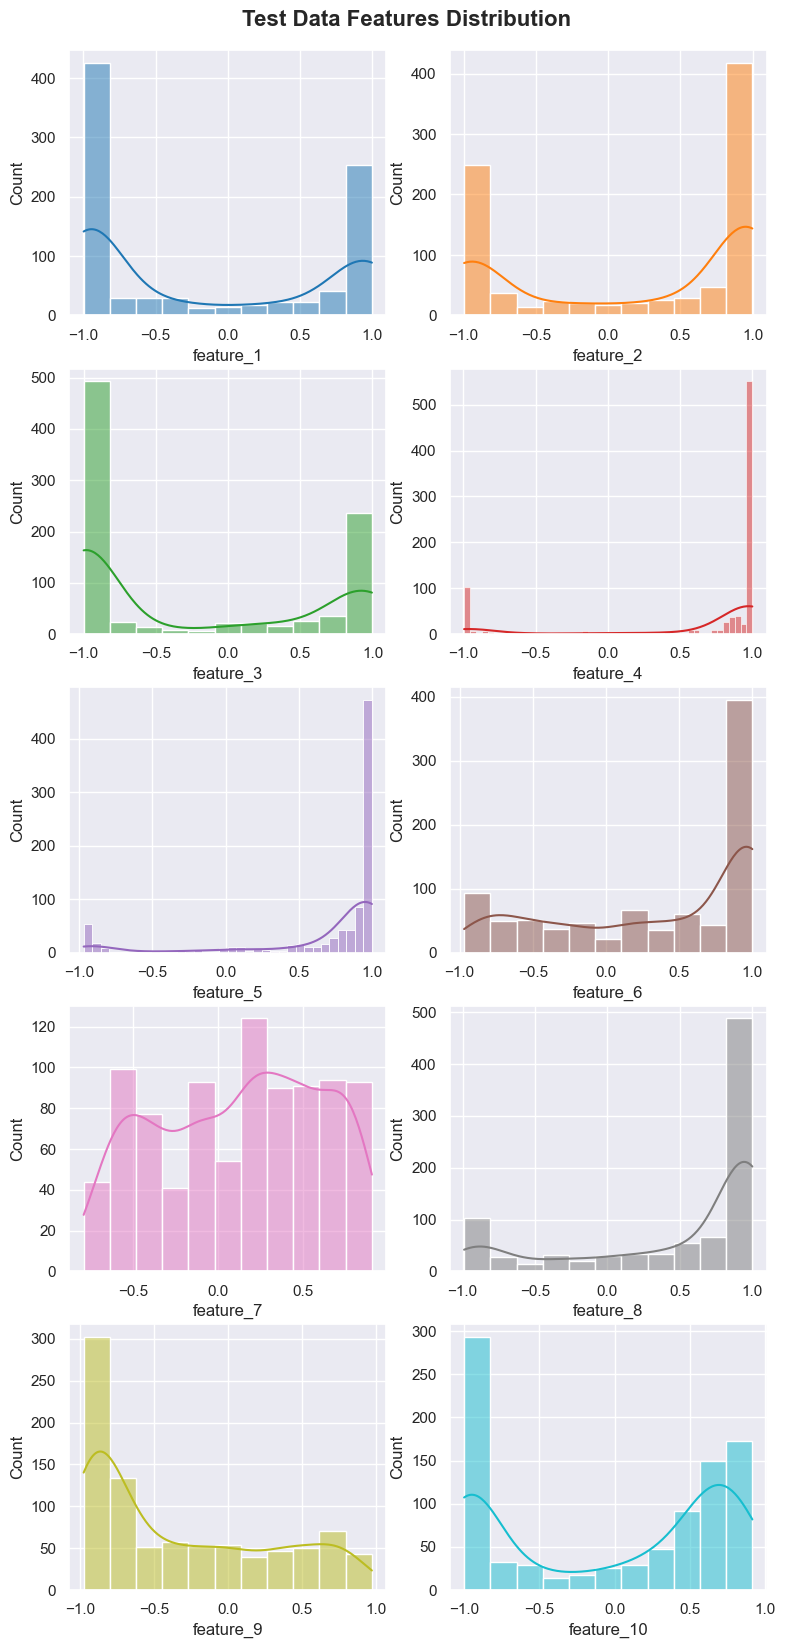

In [7]:
fig, axs = plt.subplots(5, 2, figsize=(9, 20))
fig.suptitle('Test Data Features Distribution', fontweight='bold', fontsize=16, y=.9)

colors = sns.color_palette('tab10')

i, j = 0, 0
for idx in range(len(features)):
    sns.histplot(data=df_test, x=features[idx], kde=True, color=colors[idx], ax=axs[i, j])
    if j < 1:
        j += 1
    else:
        j = 0
        i += 1

utils.save_plot(plt, IMAGES_FOLDER, 'test_features_distribution')
plt.show()

# Correlated features

In [8]:
df_train.corr(method='spearman')

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target_x,target_y,target_z
feature_1,1.000000,-0.461939,0.866471,-0.446018,-0.239452,0.311277,-0.256867,0.336804,-0.399355,-0.703366,-0.844119,-0.289518,0.319671
feature_2,-0.461939,1.000000,-0.726635,0.892933,-0.198005,-0.873566,-0.153918,0.591442,0.186200,-0.045595,0.127935,0.936444,-0.156132
feature_3,0.866471,-0.726635,1.000000,-0.737590,-0.268763,0.510639,-0.053759,-0.036781,-0.195026,-0.558565,-0.669547,-0.565269,0.113912
feature_4,-0.446018,0.892933,-0.737590,1.000000,0.144349,-0.629514,-0.036712,0.577794,-0.069199,0.029248,0.140702,0.785293,0.063029
feature_5,-0.239452,-0.198005,-0.268763,0.144349,1.000000,0.544155,-0.013436,-0.212993,-0.572395,0.562066,0.475846,-0.296230,0.639909
feature_6,0.311277,-0.873566,0.510639,-0.629514,0.544155,1.000000,0.155966,-0.510302,-0.417327,0.201169,0.025010,-0.890535,0.432257
feature_7,-0.256867,-0.153918,-0.053759,-0.036712,-0.013436,0.155966,1.000000,-0.397690,0.406229,0.085413,0.076069,-0.361625,-0.610832
feature_8,0.336804,0.591442,-0.036781,0.577794,-0.212993,-0.510302,-0.397690,1.000000,-0.301083,-0.649660,-0.544805,0.677401,0.297017
feature_9,-0.399355,0.186200,-0.195026,-0.069199,-0.572395,-0.417327,0.406229,-0.301083,1.000000,-0.064175,0.106789,0.096206,-0.855954
feature_10,-0.703366,-0.045595,-0.558565,0.029248,0.562066,0.201169,0.085413,-0.649660,-0.064175,1.000000,0.929341,-0.166701,0.050013


# PCA
Applied separately to training and test sets to detect distributional differences. If projections are similar, it suggests comparable data structure

In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_train = scaler.fit_transform(df_train[features])
scaled_test = scaler.transform(df_test[features])

<Axes: >

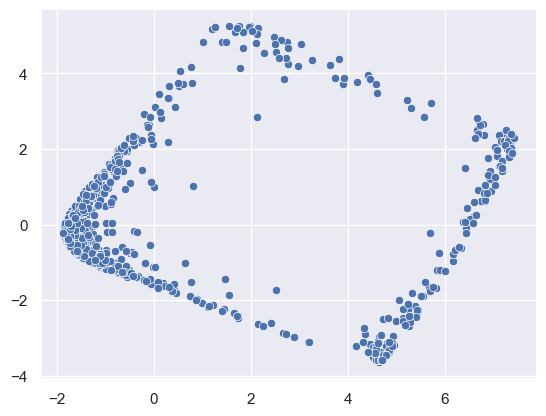

In [10]:
pca = PCA(n_components=2, random_state=42)

embedding = pca.fit_transform(scaled_train)
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1])

<Axes: >

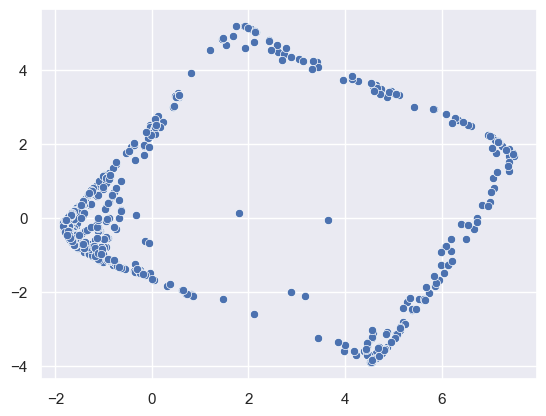

In [11]:
embedding = pca.fit_transform(scaled_test)
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1])

# UMAP
Combines sets to reveal how test data fits within the training data structure, highlighting any discrepancies in data manifold

In [12]:
df_train['Type'] = 'Train Data'
df_test['Type'] = 'Test Data'

df = pd.concat([df_train, df_test], ignore_index=True)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

scaled_df = scaler.fit_transform(df_shuffled[features])

In [13]:
umap = UMAP(random_state=42)
embedding = umap.fit_transform(scaled_df)

/Users/paolomollica/Projects/data-spell-projects/machine-learning-project/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


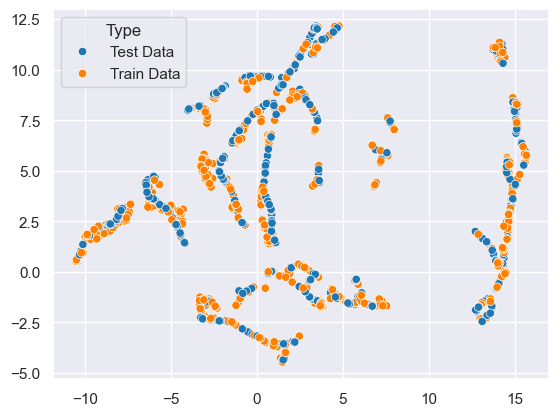

In [14]:
colors = [sns.color_palette('Paired')[1], sns.color_palette('Paired')[7]]
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df_shuffled['Type'], palette=colors)

utils.save_plot(plt, IMAGES_FOLDER, 'umap_train_test_visualization')
plt.show()

# Outliers (?)

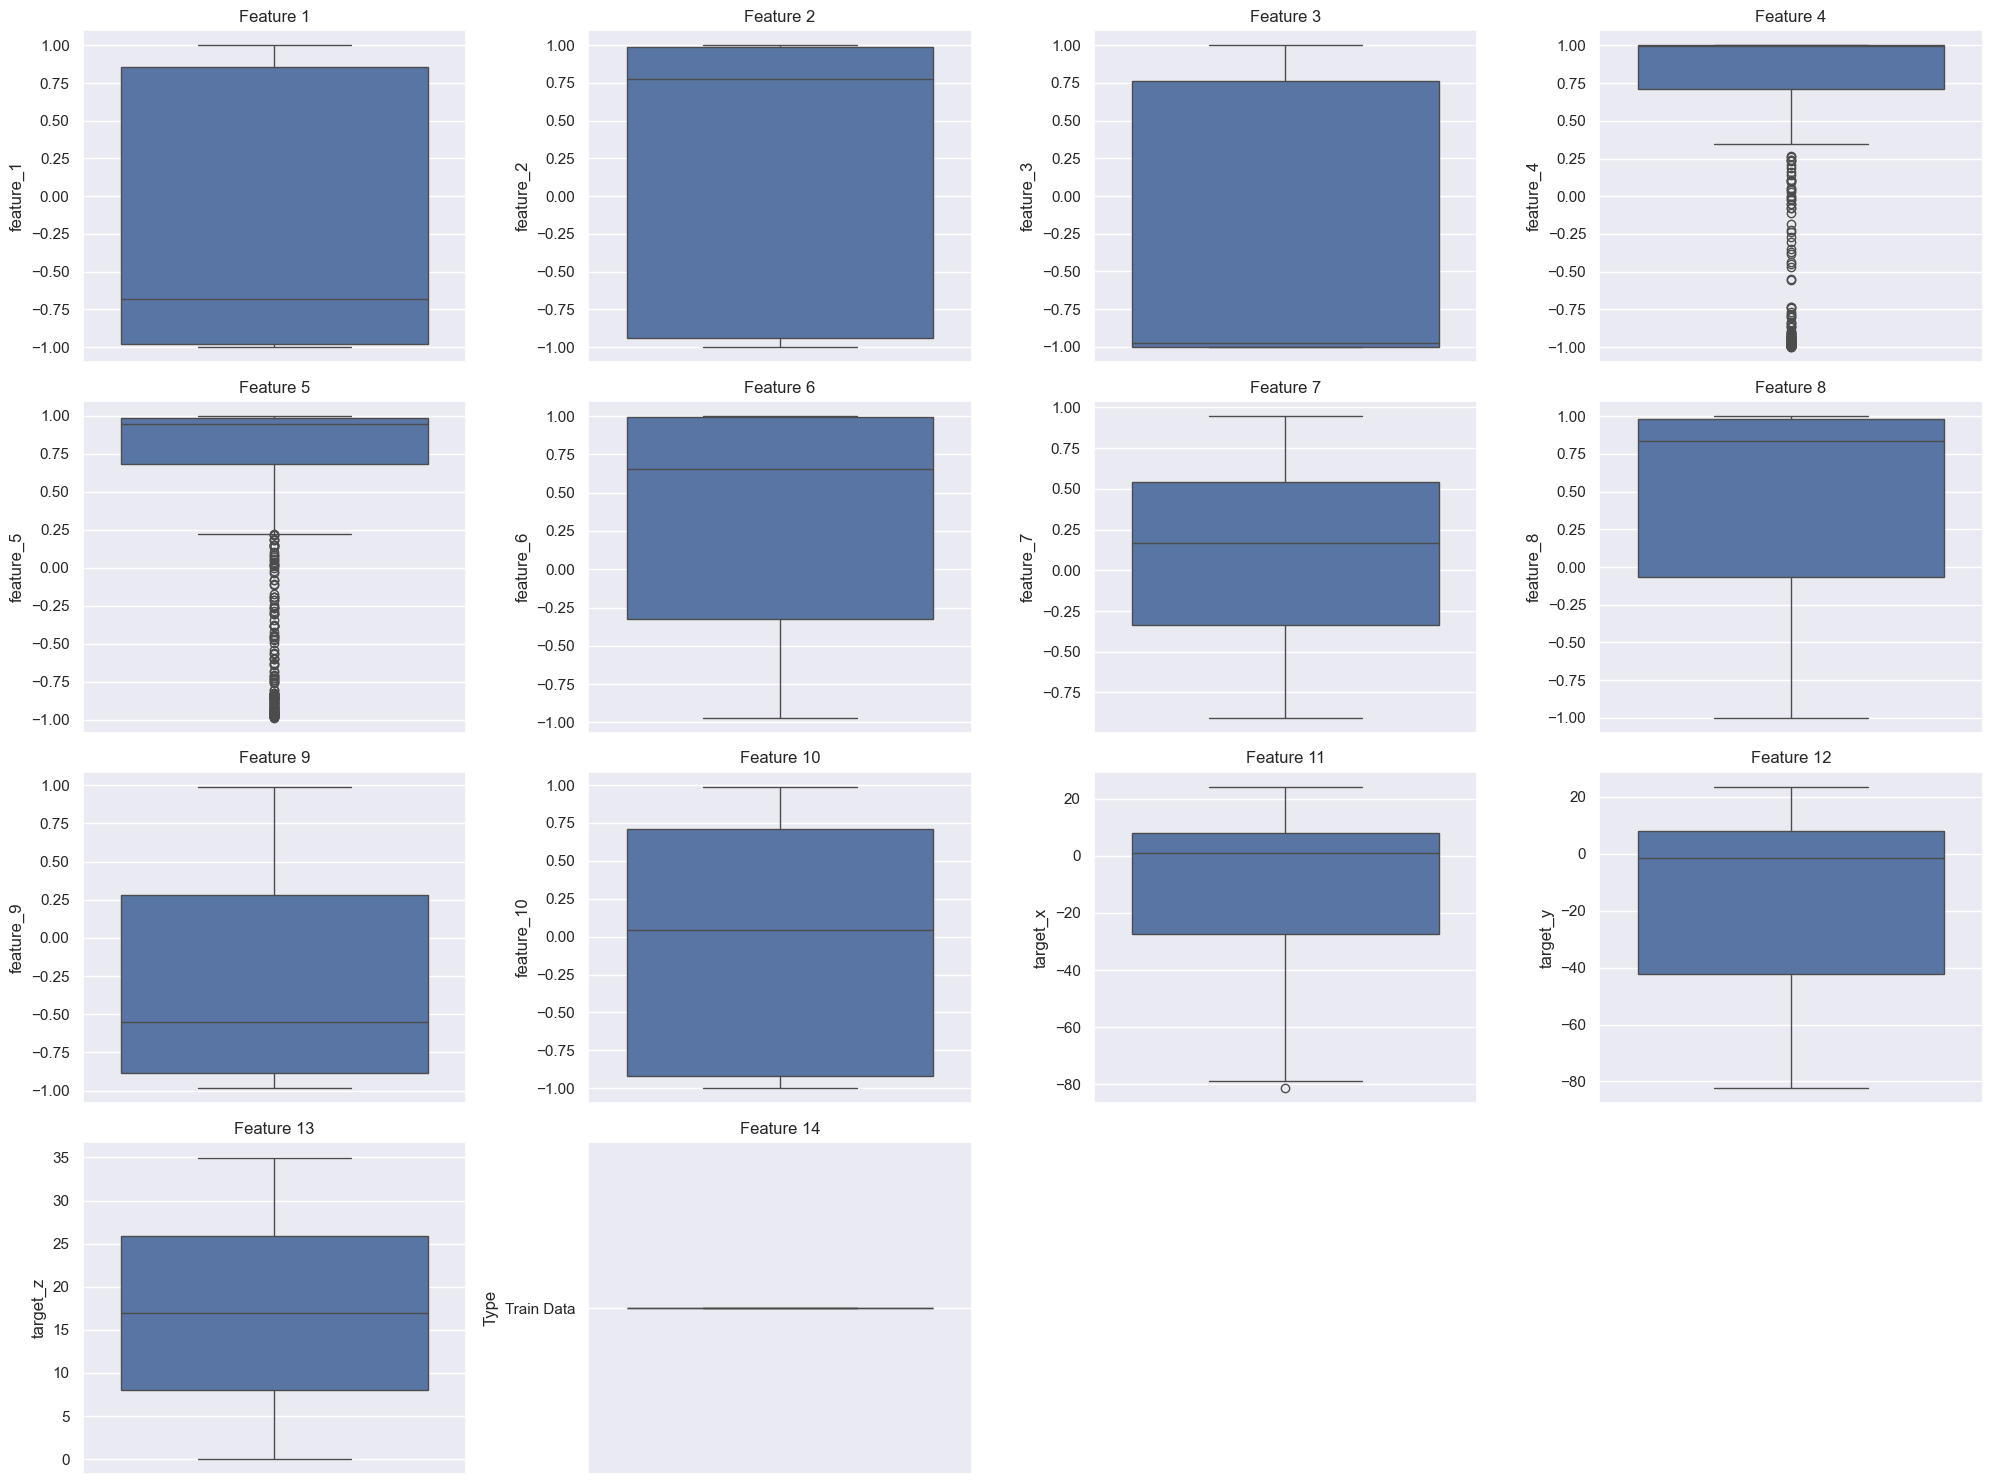

'si puo notare una forte presenza di outliers in quasi tutte le features'

In [15]:
# Plotting each feature in the data to identify outliers
plt.figure(figsize=(20, 15))
for i in range(1, len(df_train.columns) + 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_train.iloc[:, i - 1])
    plt.title(f'Feature {i}')

plt.tight_layout()

utils.save_plot(plt, IMAGES_FOLDER, 'train_boxplots')
plt.show()

"""si puo notare una forte presenza di outliers in quasi tutte le features"""

In [16]:
df_train = df_train.drop(columns=['Type'])
df_scaled = scaler.fit_transform(df_train)

pca_embedding = pca.fit_transform(df_scaled)
umap_embedding = umap.fit_transform(df_scaled)

isomap = Isomap(n_neighbors=5, n_components=2)
isomap_embedding = isomap.fit_transform(df_scaled)

/Users/paolomollica/Projects/data-spell-projects/machine-learning-project/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# Outliers using Isolation Forest

In [17]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=300, contamination=.05, random_state=42)
iso_forest.fit(df_scaled)
isof_outliers = iso_forest.predict(df_scaled)

df_train['outlier'] = isof_outliers
isof_scores = iso_forest.decision_function(df_scaled)

df_train['outlier'].value_counts()

outlier
 1    950
-1     50
Name: count, dtype: int64

In [18]:
sorted(isof_scores, reverse=True)

[0.1521021716320337,
 0.15100731709443932,
 0.15095868748300312,
 0.15030901619841092,
 0.15028573166636994,
 0.149834202970076,
 0.14924159512412966,
 0.1491839261429066,
 0.14910350802350475,
 0.1487900305128036,
 0.14869803694813483,
 0.14862407352989154,
 0.14861869359220758,
 0.14855744490748818,
 0.1483656957026973,
 0.1481973744486373,
 0.14810769882716524,
 0.14795964068282896,
 0.14719912659032386,
 0.14679219727096332,
 0.14659145441547083,
 0.1460740932059027,
 0.1452921912477938,
 0.14499537674698065,
 0.14481270355233983,
 0.14469167172820963,
 0.14445400770889422,
 0.14436434360693295,
 0.14421741857544934,
 0.14419051003346828,
 0.14412107337450009,
 0.14409142269717162,
 0.14382455902616786,
 0.14353010959862134,
 0.1429506177277431,
 0.1427723652831112,
 0.14272642814353115,
 0.1426396734137434,
 0.14232451114431416,
 0.14230399395560073,
 0.14227373046447184,
 0.14174736503925828,
 0.14162400104193534,
 0.1410480931493271,
 0.14101473620982535,
 0.14096496227568595,
 

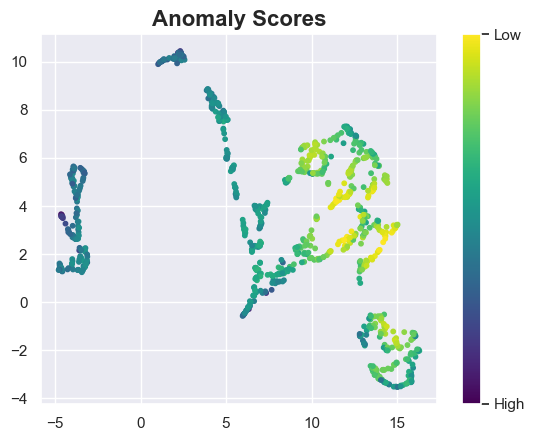

In [19]:
plt.scatter(*umap_embedding.T, c=isof_scores, cmap='viridis', s=10)

cbar = plt.colorbar()
cbar.set_ticks([np.min(isof_scores), np.max(isof_scores)])
cbar.ax.set_yticklabels(['High', 'Low'])

mask = (isof_scores < -0.2)
plt.scatter(*umap_embedding[mask].T, facecolors='none', edgecolors='r', marker='o')

plt.title('Anomaly Scores', fontweight='bold', fontsize=16)
utils.save_plot(plt, IMAGES_FOLDER, 'umap_iso_outliers')
plt.show()

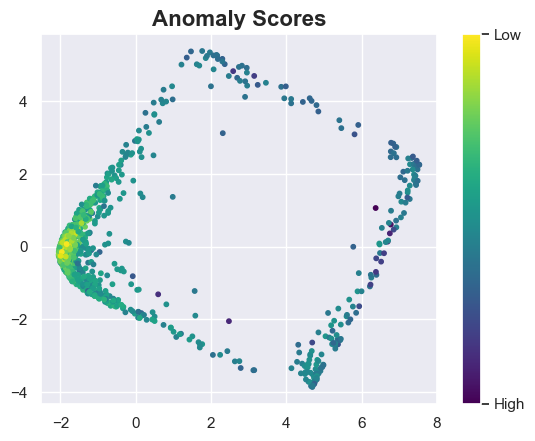

In [20]:
plt.scatter(*pca_embedding.T, c=isof_scores, cmap='viridis', s=10)

cbar = plt.colorbar()
cbar.set_ticks([np.min(isof_scores), np.max(isof_scores)])
cbar.ax.set_yticklabels(['High', 'Low'])

mask = (isof_scores < -0.2)
plt.scatter(*pca_embedding[mask].T, facecolors='none', edgecolors='r', marker='o')

plt.title('Anomaly Scores', fontweight='bold', fontsize=16)
utils.save_plot(plt, IMAGES_FOLDER, 'pca_iso_outliers')
plt.show()

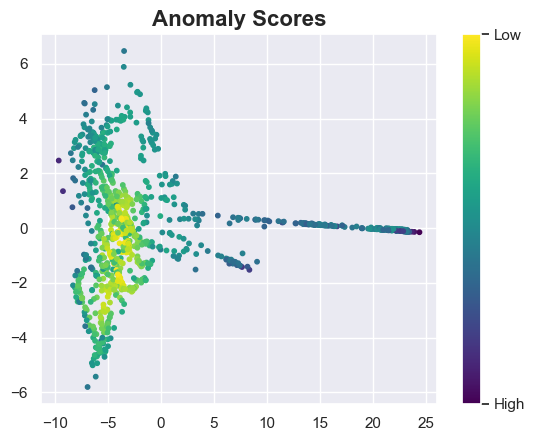

In [21]:
plt.scatter(*isomap_embedding.T, c=isof_scores, cmap='viridis', s=10)

cbar = plt.colorbar()
cbar.set_ticks([np.min(isof_scores), np.max(isof_scores)])
cbar.ax.set_yticklabels(['High', 'Low'])

mask = (isof_scores < -0.2)
plt.scatter(*isomap_embedding[mask].T, facecolors='none', edgecolors='r', marker='o')

plt.title('Anomaly Scores', fontweight='bold', fontsize=16)
utils.save_plot(plt, IMAGES_FOLDER, 'isomap_iso_outliers')
plt.show()

# Outliers using ABOD

In [22]:
from pyod.models.abod import ABOD

abod = ABOD(n_neighbors=5, contamination=0.05)
abod.fit(df_scaled)

abod_outliers = abod.predict(df_scaled)

df_train['abod_outlier'] = abod_outliers

abod_scores = abod.decision_scores_

df_train['abod_outlier'].value_counts()

abod_outlier
0    947
1     53
Name: count, dtype: int64

In [23]:
sorted(np.abs(abod_scores), reverse=True)

[50361.712356146105,
 48467.07922350911,
 8085.418714264211,
 7487.90894264585,
 7190.925609609054,
 6481.3494656046405,
 5819.77258797781,
 5426.944605605853,
 5397.303176966134,
 5246.771730288367,
 4984.1467514643455,
 4645.493728885844,
 4040.567464972589,
 3947.833349276248,
 3748.681970890503,
 3692.0433038698525,
 3472.111630275165,
 3241.333548434669,
 3153.254011568051,
 3093.550001867762,
 2969.449378819095,
 2745.7348774852385,
 2694.101579395495,
 2616.5403239862035,
 2599.487533063772,
 2568.980283036889,
 2556.457006755388,
 2553.9112695196263,
 2526.790587227969,
 2477.4898616842156,
 2448.0987577179276,
 2426.9412406302126,
 2425.2385480859593,
 2312.4545838304193,
 2257.414919970127,
 2250.6937332885586,
 2244.507541191876,
 2200.4289991608657,
 2186.732696509746,
 2170.9403140093464,
 2136.928187324991,
 2125.8995805546683,
 2069.1793983238194,
 2055.1548699739574,
 1980.341557102701,
 1922.3845479282718,
 1868.0231501478006,
 1769.491369154109,
 1729.922972649282,
 1

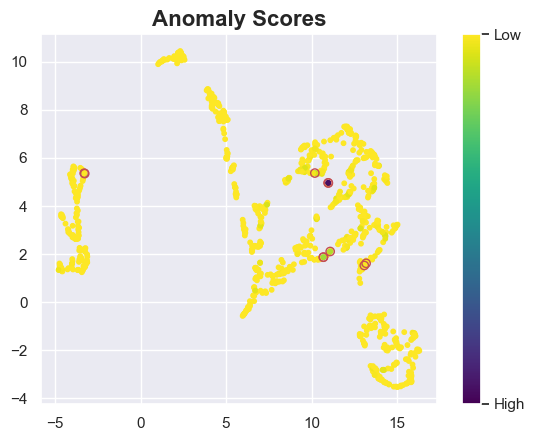

In [24]:
plt.scatter(*umap_embedding.T, c=abod_scores, cmap='viridis', s=10)

cbar = plt.colorbar()
cbar.set_ticks([np.min(abod_scores), np.max(abod_scores)])
cbar.ax.set_yticklabels(['High', 'Low'])

mask = (np.abs(abod_scores) > 5000)
plt.scatter(*umap_embedding[mask].T, facecolors='none', edgecolors='r', marker='o')

plt.title('Anomaly Scores', fontweight='bold', fontsize=16)
utils.save_plot(plt, IMAGES_FOLDER, 'umap_abod_outliers')
plt.show()

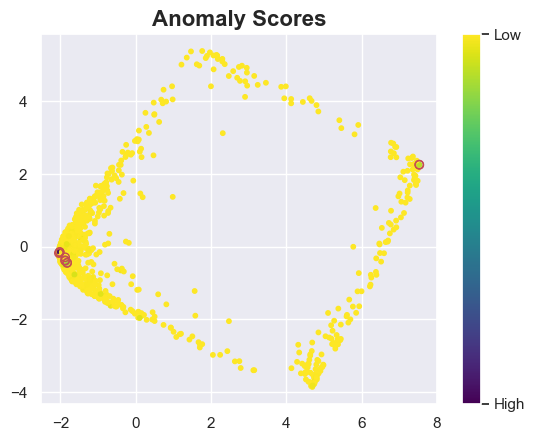

In [25]:
plt.scatter(*pca_embedding.T, c=abod_scores, cmap='viridis', s=10)

cbar = plt.colorbar()
cbar.set_ticks([np.min(abod_scores), np.max(abod_scores)])
cbar.ax.set_yticklabels(['High', 'Low'])

mask = (np.abs(abod_scores) > 5000)
plt.scatter(*pca_embedding[mask].T, facecolors='none', edgecolors='r', marker='o')

plt.title('Anomaly Scores', fontweight='bold', fontsize=16)
utils.save_plot(plt, IMAGES_FOLDER, 'pca_abod_outliers')
plt.show()

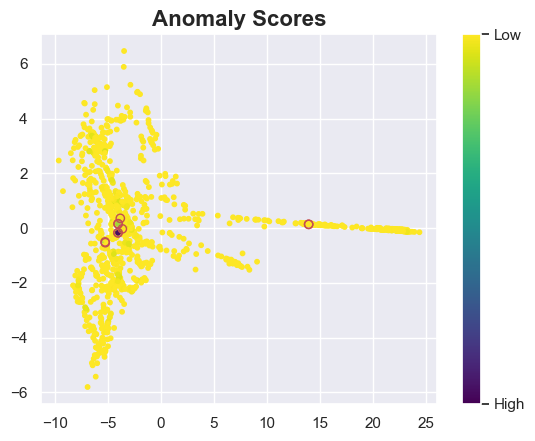

In [26]:
plt.scatter(*isomap_embedding.T, c=abod_scores, cmap='viridis', s=10)

cbar = plt.colorbar()
cbar.set_ticks([np.min(abod_scores), np.max(abod_scores)])
cbar.ax.set_yticklabels(['High', 'Low'])

mask = (np.abs(abod_scores) > 5000)
plt.scatter(*isomap_embedding[mask].T, facecolors='none', edgecolors='r', marker='o')

plt.title('Anomaly Scores', fontweight='bold', fontsize=16)
utils.save_plot(plt, IMAGES_FOLDER, 'isomap_abod_outliers')
plt.show()

# Outliers using LOF

In [27]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_outliers = lof.fit_predict(df_scaled)

# (-1) -> outlier, which is the opposite with respect to Isolation Forest
lof_outliers = [1 if x == 1 else -1 for x in lof_outliers]

df_train['lof_outlier'] = lof_outliers
lof_scores = -lof.negative_outlier_factor_

df_train['lof_outlier'].value_counts()

lof_outlier
 1    950
-1     50
Name: count, dtype: int64

In [28]:
sorted(lof_scores, reverse=True)

[1.8146371059821296,
 1.6324973916785475,
 1.627795578950512,
 1.5739579639469912,
 1.4709214625678741,
 1.4593868303799868,
 1.450386465990895,
 1.4333225143895234,
 1.426363244106638,
 1.4134926964827763,
 1.4131611055531832,
 1.41310201219759,
 1.4014423046604978,
 1.3902772501289673,
 1.3892147830640644,
 1.3731020427888085,
 1.333003045643096,
 1.3226651024064668,
 1.318807197534561,
 1.306979458657398,
 1.3048066399204654,
 1.2955754063937066,
 1.2953842959530335,
 1.2936451998187535,
 1.29089671860886,
 1.2902227310028138,
 1.2833822907511068,
 1.2804120442935236,
 1.273030261351337,
 1.2682308696470408,
 1.2637219104817918,
 1.260829369271216,
 1.2535199937449806,
 1.248807470855272,
 1.2449823069865251,
 1.2413367914876998,
 1.239749075596368,
 1.236862034386268,
 1.2354594881812964,
 1.2307168111585889,
 1.230280902287298,
 1.2187377378872701,
 1.211317339167687,
 1.208217561581033,
 1.2081388741158479,
 1.2077733993276678,
 1.2063520223091624,
 1.2053212899572223,
 1.2017012

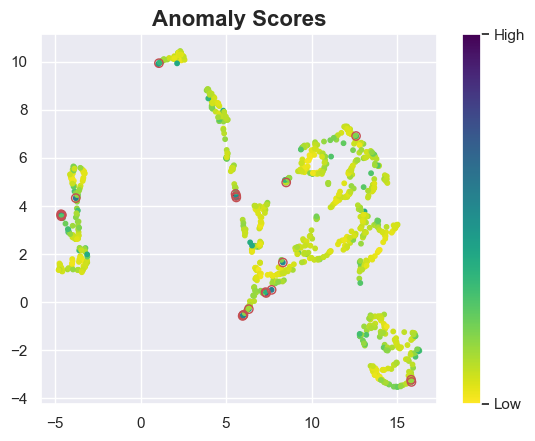

In [29]:
plt.scatter(*umap_embedding.T, c=lof_scores, cmap='viridis_r', s=10)

cbar = plt.colorbar()
cbar.set_ticks([np.max(lof_scores), np.min(lof_scores)])
cbar.ax.set_yticklabels(['High', 'Low'])

mask = (lof_scores > 1.3)
plt.scatter(*umap_embedding[mask].T, facecolors='none', edgecolors='r', marker='o')

plt.title('Anomaly Scores', fontweight='bold', fontsize=16)
utils.save_plot(plt, IMAGES_FOLDER, 'umap_lof_outliers')
plt.show()

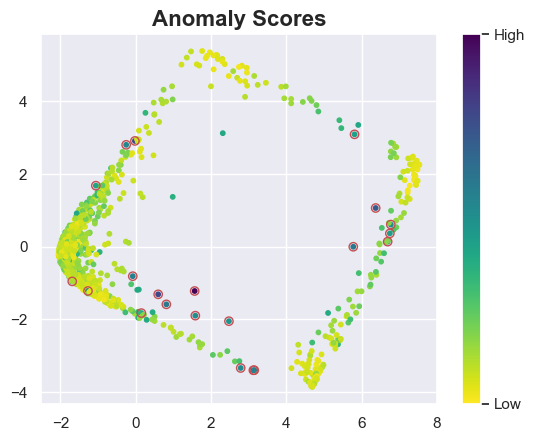

In [30]:
plt.scatter(*pca_embedding.T, c=lof_scores, cmap='viridis_r', s=10)

cbar = plt.colorbar()
cbar.set_ticks([np.max(lof_scores), np.min(lof_scores)])
cbar.ax.set_yticklabels(['High', 'Low'])

mask = (lof_scores > 1.3)
plt.scatter(*pca_embedding[mask].T, facecolors='none', edgecolors='r', marker='o')

plt.title('Anomaly Scores', fontweight='bold', fontsize=16)
utils.save_plot(plt, IMAGES_FOLDER, 'pca_lof_outliers')
plt.show()

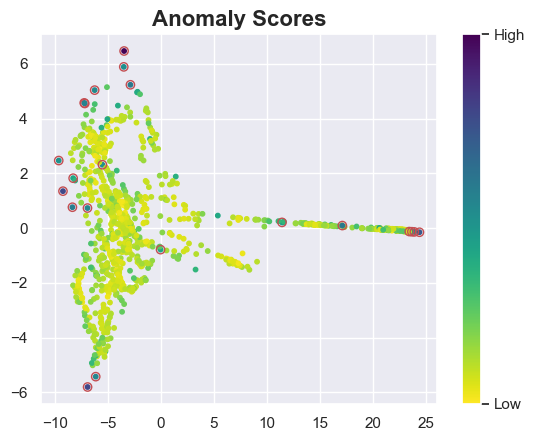

In [31]:
plt.scatter(*isomap_embedding.T, c=lof_scores, cmap='viridis_r', s=10)

cbar = plt.colorbar()
cbar.set_ticks([np.max(lof_scores), np.min(lof_scores)])
cbar.ax.set_yticklabels(['High', 'Low'])

mask = (lof_scores > 1.3)
plt.scatter(*isomap_embedding[mask].T, facecolors='none', edgecolors='r', marker='o')

plt.title('Anomaly Scores', fontweight='bold', fontsize=16)
utils.save_plot(plt, IMAGES_FOLDER, 'isomap_lof_outliers')
plt.show()